In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
import requests
# Import the time module.
import time

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | urumqi
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | champerico
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | las cruces
Processing Record 8 of Set 1 | yenagoa
Processing Record 9 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | cap malheureux
Processing Record 18 of Set 1 | baiyin
Processing Record 19 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 1 | maamba
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | coihaique
Processing Record 23 of Set 1 |

Processing Record 36 of Set 4 | bredy
Processing Record 37 of Set 4 | presidencia roque saenz pena
Processing Record 38 of Set 4 | babanusah
City not found. Skipping...
Processing Record 39 of Set 4 | dunedin
Processing Record 40 of Set 4 | mogwase
Processing Record 41 of Set 4 | faanui
Processing Record 42 of Set 4 | alim
Processing Record 43 of Set 4 | leningradskiy
Processing Record 44 of Set 4 | campbellsville
Processing Record 45 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 46 of Set 4 | palora
Processing Record 47 of Set 4 | divnogorsk
Processing Record 48 of Set 4 | pio ix
Processing Record 49 of Set 4 | nurota
Processing Record 50 of Set 4 | srednekolymsk
Processing Record 1 of Set 5 | kaitangata
Processing Record 2 of Set 5 | hobyo
Processing Record 3 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 5 | verkhnyaya maksakovka
Processing Record 5 of Set 5 | caconda
Processing Record 6 of Set 5 | sur
Processing Record 7 of Set 

Processing Record 22 of Set 8 | boguchany
Processing Record 23 of Set 8 | vega de alatorre
Processing Record 24 of Set 8 | la grande
Processing Record 25 of Set 8 | inuvik
Processing Record 26 of Set 8 | vigevano
Processing Record 27 of Set 8 | nyuksenitsa
Processing Record 28 of Set 8 | yerbogachen
Processing Record 29 of Set 8 | igboho
Processing Record 30 of Set 8 | saint-ambroise
Processing Record 31 of Set 8 | mucuri
Processing Record 32 of Set 8 | yingzhong
City not found. Skipping...
Processing Record 33 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 34 of Set 8 | bitkine
Processing Record 35 of Set 8 | vanimo
Processing Record 36 of Set 8 | lagos
Processing Record 37 of Set 8 | bogolyubovo
Processing Record 38 of Set 8 | pisco
Processing Record 39 of Set 8 | necochea
Processing Record 40 of Set 8 | los banos
Processing Record 41 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 42 of Set 8 | dwarka
Processing Record 43 of Set 8 | saryshagan

Processing Record 8 of Set 12 | zhuhai
Processing Record 9 of Set 12 | peniche
Processing Record 10 of Set 12 | artyk
City not found. Skipping...
Processing Record 11 of Set 12 | esperance
Processing Record 12 of Set 12 | saint-pierre
Processing Record 13 of Set 12 | japura
Processing Record 14 of Set 12 | pacific grove
Processing Record 15 of Set 12 | antofagasta
Processing Record 16 of Set 12 | obihiro
Processing Record 17 of Set 12 | price
Processing Record 18 of Set 12 | tymovskoye
Processing Record 19 of Set 12 | san roque
Processing Record 20 of Set 12 | cairns
Processing Record 21 of Set 12 | longlac
City not found. Skipping...
Processing Record 22 of Set 12 | asht
City not found. Skipping...
Processing Record 23 of Set 12 | manzhouli
Processing Record 24 of Set 12 | araouane
Processing Record 25 of Set 12 | cabral
Processing Record 26 of Set 12 | evensk
Processing Record 27 of Set 12 | kishanpur
Processing Record 28 of Set 12 | rubiataba
Processing Record 29 of Set 12 | labuan


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Urumqi,43.8010,87.6005,53.60,16,0,6.71,CN,2021-04-26 04:46:07
1,Atuona,-9.8000,-139.0333,79.95,76,77,19.13,PF,2021-04-26 04:46:00
2,Vaini,-21.2000,-175.2000,82.40,89,75,4.61,TO,2021-04-26 04:46:08
3,Champerico,14.3000,-91.9167,66.99,95,90,3.89,GT,2021-04-26 04:46:08
4,Avarua,-21.2078,-159.7750,78.80,78,20,5.75,CK,2021-04-26 04:46:01
5,Bluff,-46.6000,168.3333,48.00,65,81,15.99,NZ,2021-04-26 04:45:49
6,Las Cruces,32.3123,-106.7783,70.00,8,1,8.05,US,2021-04-26 04:46:09
7,Yenagoa,4.9247,6.2642,78.15,88,97,3.24,NG,2021-04-26 04:46:09
8,Chokurdakh,70.6333,147.9167,30.92,98,100,10.00,RU,2021-04-26 04:46:10
9,Castro,-24.7911,-50.0119,55.62,96,81,2.30,BR,2021-04-26 04:45:55


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_order_df = city_data_df[new_column_order]

In [11]:
city_data_order_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Urumqi,CN,2021-04-26 04:46:07,43.8010,87.6005,53.60,16,0,6.71
1,Atuona,PF,2021-04-26 04:46:00,-9.8000,-139.0333,79.95,76,77,19.13
2,Vaini,TO,2021-04-26 04:46:08,-21.2000,-175.2000,82.40,89,75,4.61
3,Champerico,GT,2021-04-26 04:46:08,14.3000,-91.9167,66.99,95,90,3.89
4,Avarua,CK,2021-04-26 04:46:01,-21.2078,-159.7750,78.80,78,20,5.75


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/25/21'

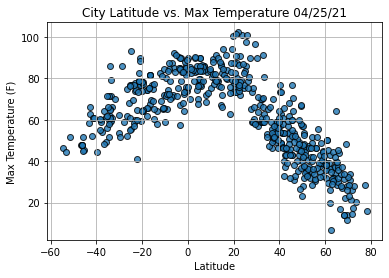

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


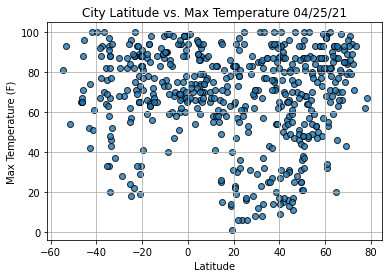

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()
